In [1]:
import numpy as np
import pandas as pd
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

# Import and Explore the Data

In [2]:
data=pd.read_csv('train.csv')
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
data = data.drop(columns=['Id']) 

In [4]:
# Set Pandas to display all columns
pd.set_option('display.max_columns', None)
# Now call describe()
data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


MSSubClass, OverallQual, OverallCond, YearBuilt, YearRemodAdd, GarageYrBlt, MoSold, YrSold : are in their acceptable range no need for outlier detection

LotFrontage, LotArea, MasVnrArea, GrLivArea, GarageArea  : has high max values, possible outliers

MasVnrArea, BsmtFinSF1 ,BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF

BsmtFullBath	BsmtHalfBath	FullBath	HalfBath	BedroomAbvGr	KitchenAbvGr	TotRmsAbvGrd	Fireplaces, GarageCars

WoodDeckSF,	OpenPorchSF,	EnclosedPorch,	3SsnPorch	,ScreenPorch	, PoolArea, MiscVal has many 0 values

Our target variable SalePrice has high but acceptable values but they migth be corespond to some outliers such as Pool or MiscVal

In [5]:
data.describe(include='object')  

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,588,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,3,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,445,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


# Data Cleaning

## Missing Values

In [6]:
# Get the count of missing values
missing_val = data.isnull().sum().sort_values(ascending=False)

# Filter for features with missing values
missing_val = missing_val[missing_val > 0]

# Get the data types of those features
missing_val_dtype = data.dtypes[missing_val.index]

# Combine missing values and data types into a DataFrame
missing_info = pd.DataFrame({'Missing Values': missing_val, 'Dtype': missing_val_dtype})

print("Features with missing values and their data types:\n", missing_info)


Features with missing values and their data types:
               Missing Values    Dtype
PoolQC                  1453   object
MiscFeature             1406   object
Alley                   1369   object
Fence                   1179   object
MasVnrType               872   object
FireplaceQu              690   object
LotFrontage              259  float64
GarageYrBlt               81  float64
GarageCond                81   object
GarageType                81   object
GarageFinish              81   object
GarageQual                81   object
BsmtExposure              38   object
BsmtFinType2              38   object
BsmtCond                  37   object
BsmtQual                  37   object
BsmtFinType1              37   object
MasVnrArea                 8  float64
Electrical                 1   object


In [7]:
data.drop(["PoolQC","Fence","Alley","MiscFeature"] ,axis=1, inplace=True) # these columns have too much missing values


### Categorical missing values

In [8]:
# ensure that the missing values in following columns ar in the same rows
related_columns = ['GarageYrBlt', 'GarageCond', 'GarageType', 'GarageFinish', 'GarageQual']
# Extract rows where 'GarageYrBlt' is missing
missing_bsmtfintype2 = data[data['GarageYrBlt'].isnull()]

# Calculate the sum of missing values in each related column in the extracted DataFrame
missing_counts_in_extracted = missing_bsmtfintype2[related_columns].isnull().sum()

# Display the missing counts in the extracted DataFrame
print("Missing values count in the extracted rows where 'GarageYrBlt' is missing:")
print(missing_counts_in_extracted)       

Missing values count in the extracted rows where 'GarageYrBlt' is missing:
GarageYrBlt     81
GarageCond      81
GarageType      81
GarageFinish    81
GarageQual      81
dtype: int64


In [9]:
# ensure that the missing values in following columns ar in the same rows
related_columns = ['BsmtExposure', 'BsmtFinType2', 'BsmtCond', 'BsmtQual', 'BsmtFinType1']
# Extract rows where 'BsmtFinType2' is missing
missing_bsmtfintype2 = data[data['BsmtFinType2'].isnull()]

# Calculate the sum of missing values in each related column in the extracted DataFrame
missing_counts_in_extracted = missing_bsmtfintype2[related_columns].isnull().sum()

# Display the missing counts in the extracted DataFrame
print("Missing values count in the extracted rows where 'BsmtFinType2' is missing:")
print(missing_counts_in_extracted)


Missing values count in the extracted rows where 'BsmtFinType2' is missing:
BsmtExposure    37
BsmtFinType2    38
BsmtCond        37
BsmtQual        37
BsmtFinType1    37
dtype: int64


In [10]:
impute_with_na = ["MasVnrType", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond","BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"]

for col in impute_with_na:
    data[col] = data[col].fillna(value="NA")   


In [11]:
most_frequent_category = data['Electrical'].mode()[0] # replace missing category in Electrical column with most frequent category

# Replace missing values with the most frequent category
data['Electrical'].fillna(most_frequent_category, inplace=True)

C:\Users\ASESEN20\AppData\Local\Temp\ipykernel_19864\4039750759.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Electrical'].fillna(most_frequent_category, inplace=True)


### Numerical missing values

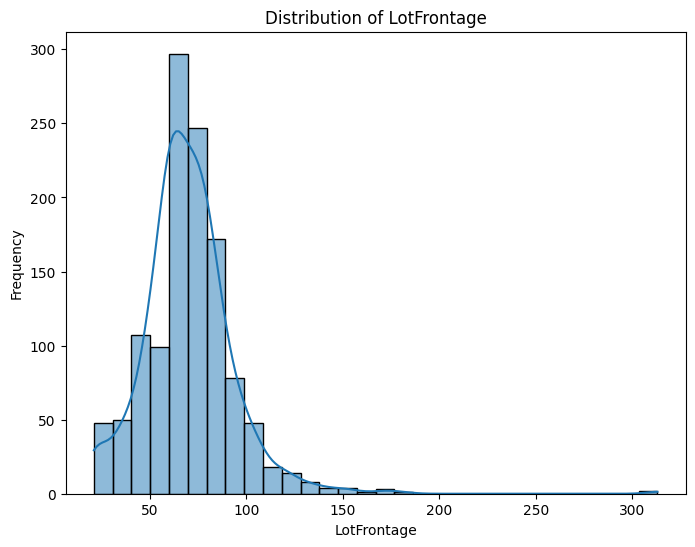

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64


In [12]:
# Plot the distribution of LotFrontage
plt.figure(figsize=(8, 6))
sns.histplot(data['LotFrontage'], bins=30, kde=True)
plt.title('Distribution of LotFrontage')
plt.xlabel('LotFrontage')
plt.ylabel('Frequency')
plt.show()

# Check summary statistics
print(data['LotFrontage'].describe())


In [13]:
numerical_columns = data.select_dtypes(include=[np.number]).columns.tolist()
correlation_matrix = data[numerical_columns].corr()
# Sort values by correlation with 'LotFrontage' and print the top 10
top_10_correlated = abs(correlation_matrix['LotFrontage']).sort_values(ascending=False).head(10)
print(top_10_correlated)

LotFrontage     1.000000
1stFlrSF        0.457181
LotArea         0.426095
GrLivArea       0.402797
TotalBsmtSF     0.392075
MSSubClass      0.386347
TotRmsAbvGrd    0.352096
SalePrice       0.351799
GarageArea      0.344997
GarageCars      0.285691
Name: LotFrontage, dtype: float64


 LotFrontage has a distribution close to normal also its mean and median are olmost same therefore we can use mean imputation. But I have used Imputation Based on Neighborhood: Since LotFrontage is related to the size of the property and possibly its neighborhood

In [14]:
data['LotFrontage'] = data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.mean()))

In [15]:
correlation1 = data['YearBuilt'].corr(data['GarageYrBlt'])
correlation2 = data['YearBuilt'].corr(data['SalePrice'])
correlation3 = data['GarageYrBlt'].corr(data['SalePrice'])
print(correlation1)
print(correlation2)
print(correlation3)

0.825667484174342
0.5228973328794968
0.48636167748786086


In [16]:
# GarageYrBlt has 81 missing variables, since it has high correlation wiht YearBuilt we can drop it (YearBuilt has higher correlation with target)
data = data.drop(columns=['GarageYrBlt'])

In [17]:
data['MasVnrArea'].fillna(0.0, inplace=True) # MasVnrArea (Masonry veneer area) has same number of missing values as MasVnrType which indicates there is no Masonry veneer


C:\Users\ASESEN20\AppData\Local\Temp\ipykernel_19864\563885949.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['MasVnrArea'].fillna(0.0, inplace=True) # MasVnrArea (Masonry veneer area) has same number of missing values as MasVnrType which indicates there is no Masonry veneer


In [18]:
# chek for duplicates
duplicates=data.duplicated().sum()
print(duplicates)

0


## Outlier Detection

In [19]:
numerical_columns = data.select_dtypes(include=[np.number]).columns.tolist()
data[numerical_columns].describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.725218,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,22.426978,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,70.083333,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [20]:
# Check the number of non-zero values for each column
non_zero_counts = data[numerical_columns].astype(bool).sum(axis=0)
# Filter columns with zero values
zero_value_columns = non_zero_counts[non_zero_counts < 1400]

# Print columns with zero values
print("Columns non-zero caunts:")
print(zero_value_columns)

Columns non-zero caunts:
MasVnrArea        591
BsmtFinSF1        993
BsmtFinSF2        167
BsmtUnfSF        1342
2ndFlrSF          631
LowQualFinSF       26
BsmtFullBath      604
BsmtHalfBath       82
HalfBath          547
Fireplaces        770
GarageCars       1379
GarageArea       1379
WoodDeckSF        699
OpenPorchSF       804
EnclosedPorch     208
3SsnPorch          24
ScreenPorch       116
PoolArea            7
MiscVal            52
dtype: int64


In [21]:
# Create the new binary columns
data['HasMasVnr'] = (data['MasVnrArea'] > 0).astype(int)
data['Has2ndFlr'] = (data['2ndFlrSF'] > 0).astype(int)
data['HasWoodDeck'] = (data['WoodDeckSF'] > 0).astype(int)
data['HasEnclosedPorch'] = (data['EnclosedPorch'] > 0).astype(int)
data['HasBsmtFinSF2'] = (data['BsmtFinSF2'] > 0).astype(int)


# Check the result
data[['MasVnrArea', 'HasMasVnr']].head()

,MasVnrArea,HasMasVnr
0,196.0,1
1,0.0,0
2,162.0,1
3,0.0,0
4,350.0,1


In [22]:
data['TotPorch']=data['OpenPorchSF']+data['EnclosedPorch']+data['3SsnPorch']+data['ScreenPorch']

In [23]:
data.drop(['BsmtFinSF2','BsmtHalfBath','ScreenPorch'] ,axis=1, inplace=True) 

In [24]:
# Columns with many zero values
zero_value_cols = ['PoolArea', 'MiscVal', '3SsnPorch', 'LowQualFinSF']

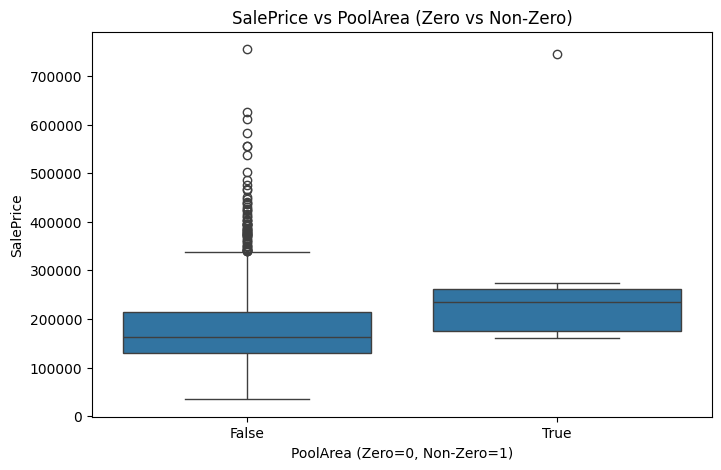

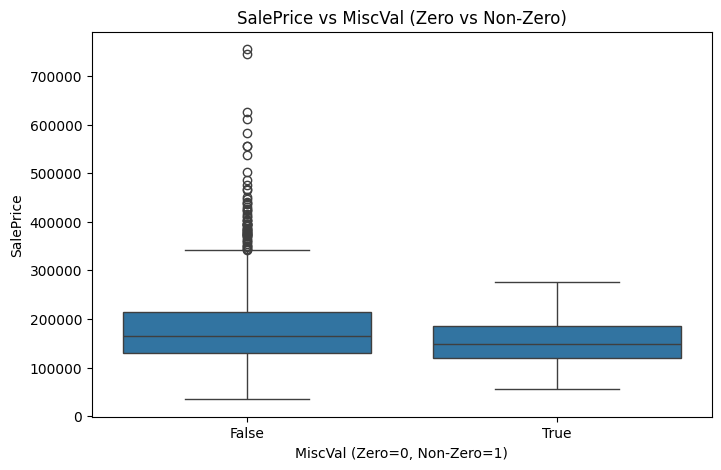

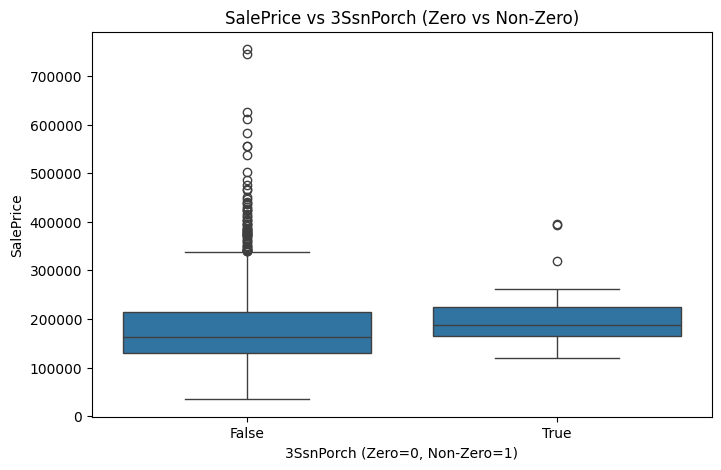

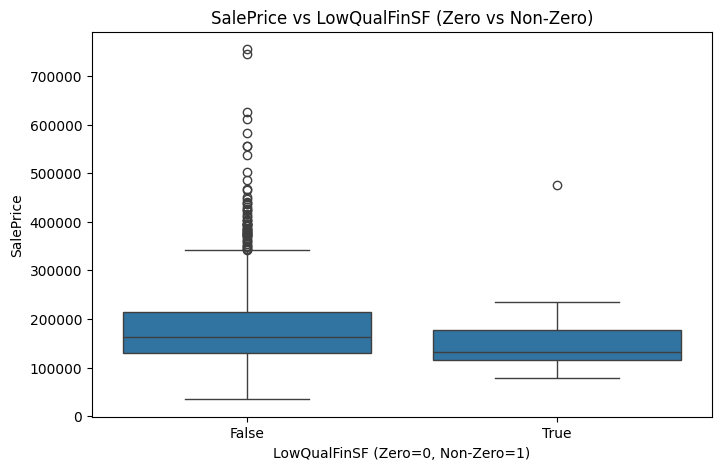

In [25]:
# Boxplots to compare SalePrice for zero vs non-zero values
for col in zero_value_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=(data[col] > 0), y=data['SalePrice'])
    plt.title(f'SalePrice vs {col} (Zero vs Non-Zero)')
    plt.xlabel(f'{col} (Zero=0, Non-Zero=1)')
    plt.ylabel('SalePrice')
    plt.show()

In [26]:
data.drop(zero_value_cols ,axis=1, inplace=True) 

In [27]:
data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SalePrice,HasMasVnr,Has2ndFlr,HasWoodDeck,HasEnclosedPorch,HasBsmtFinSF2,TotPorch
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.725218,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,567.240411,1057.429452,1162.626712,346.992466,1515.463699,0.425342,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,6.321918,2007.815753,180921.195890,0.404795,0.432192,0.478767,0.142466,0.114384,87.084932
std,42.300571,22.426978,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,441.866955,438.705324,386.587738,436.528436,525.480383,0.518911,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,2.703626,1.328095,79442.502883,0.491020,0.495550,0.499720,0.349647,0.318386,105.190364
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,1129.500000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,50.000000,70.083333,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,477.500000,991.500000,1087.000000,0.000000,1464.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,6.000000,2008.000000,163000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,808.000000,1298.250000,1391.250000,728.000000,1776.750000,1.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,8.000000,2009.000000,214000.000000,1.000000,1.000000,1.000000,0.000000,0.000000,136.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,2336.000000,6110.000000,4692.000000,2065.000000,5642.000000,3.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,12.000000,2010.000000,755000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1027.000000


In [28]:
detect_outliers=['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','TotPorch']

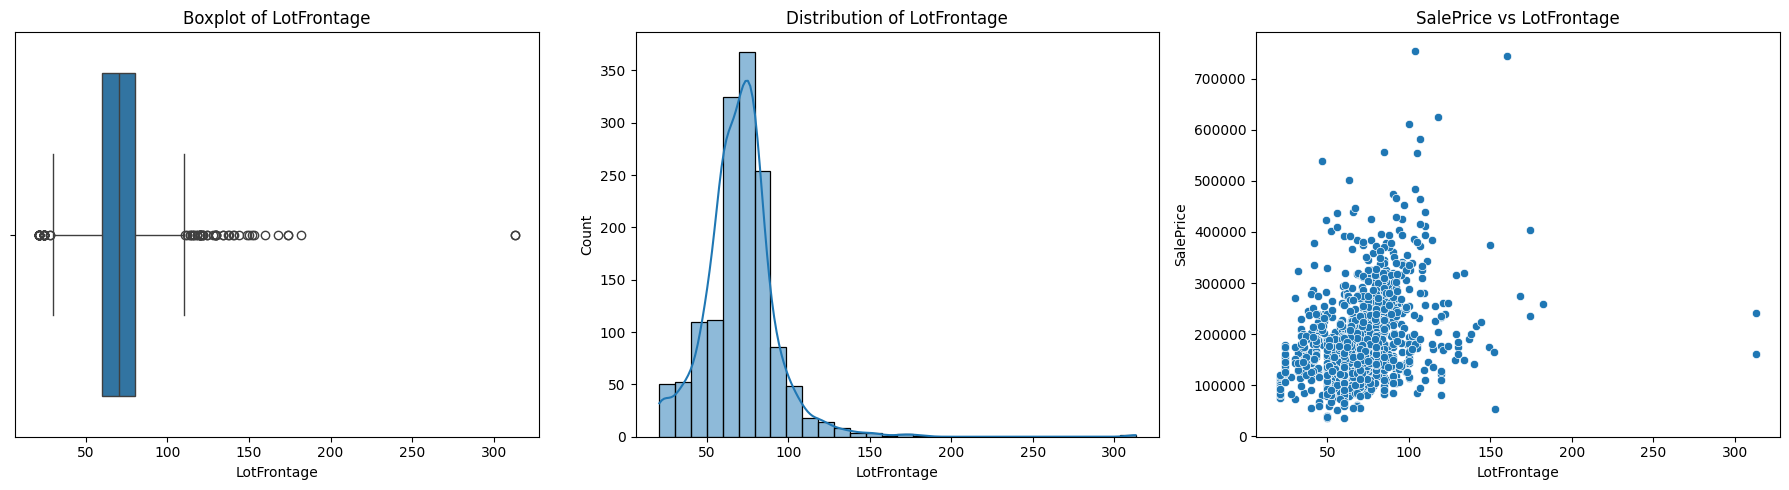

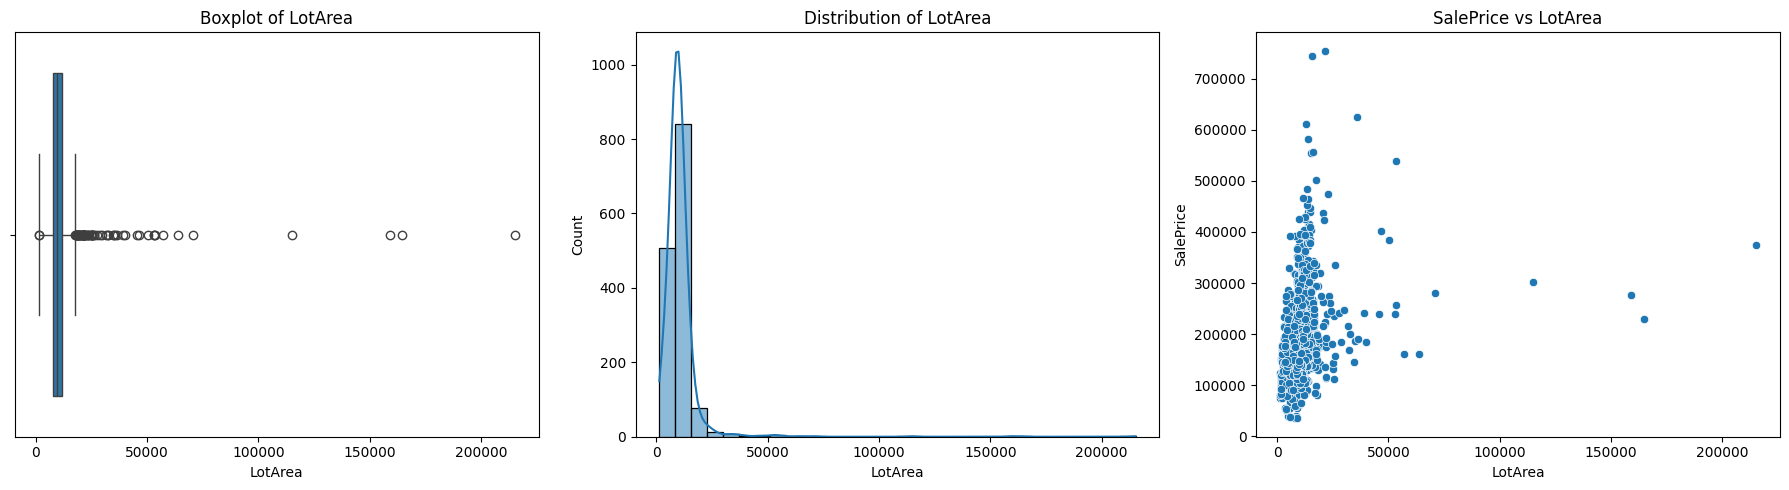

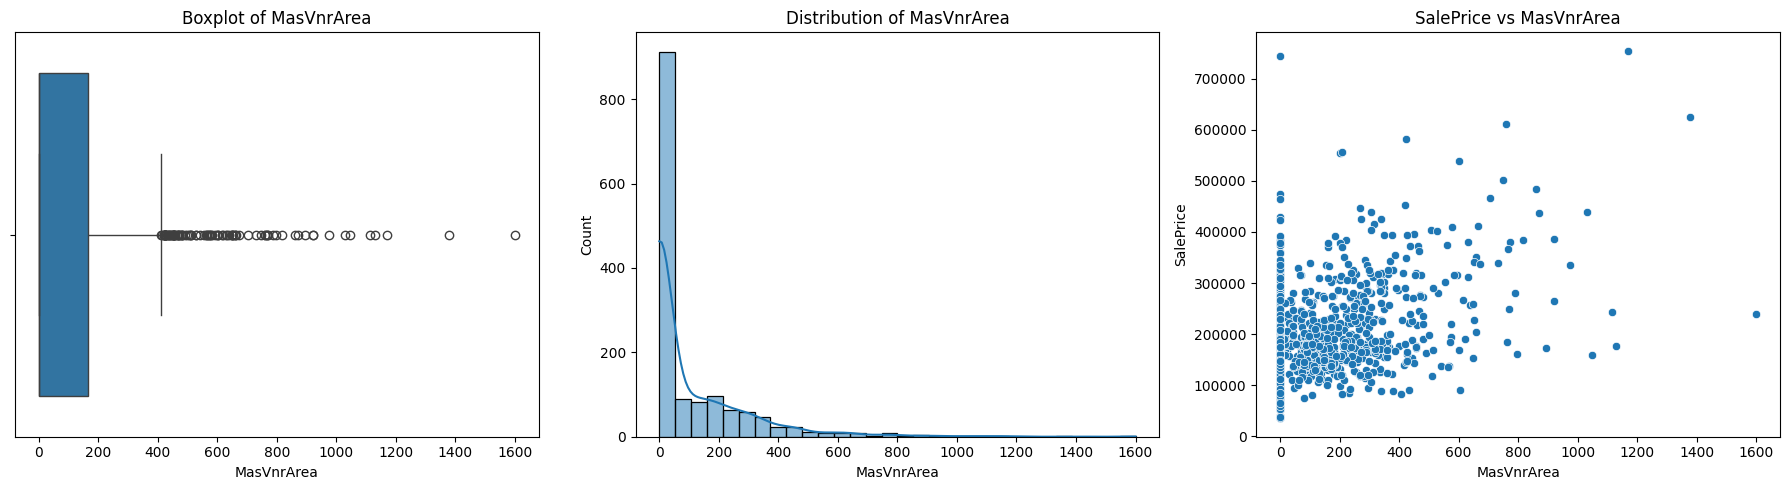

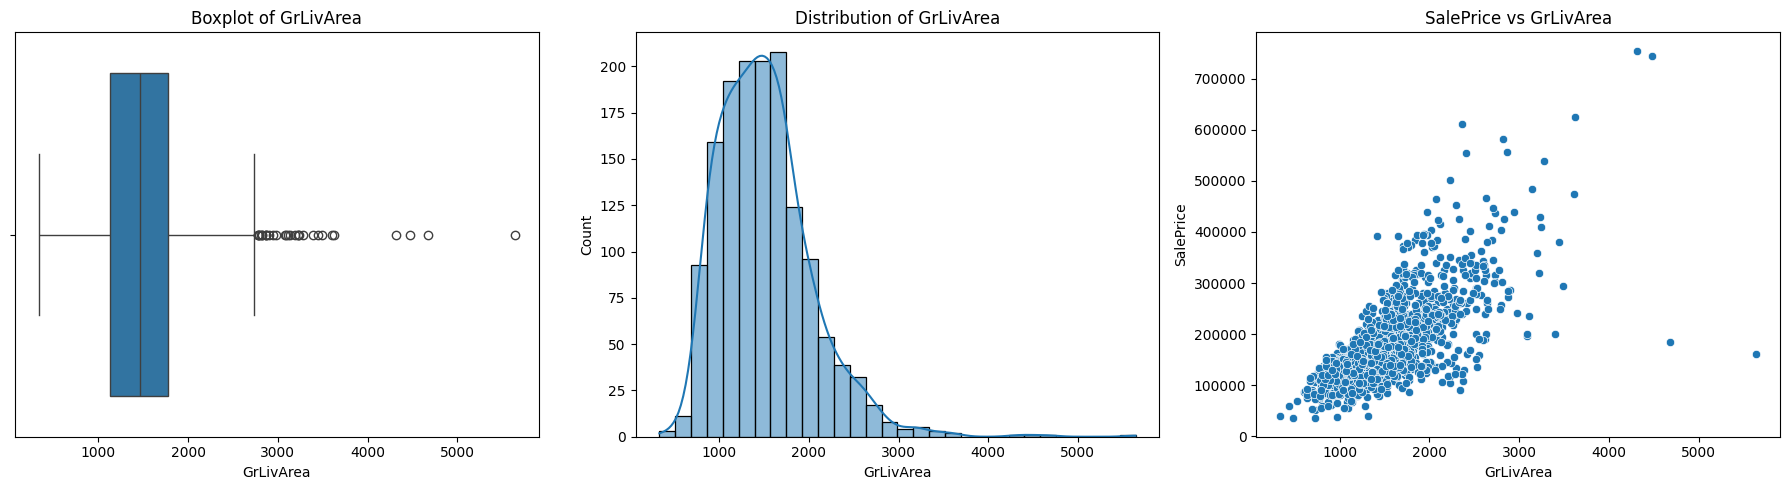

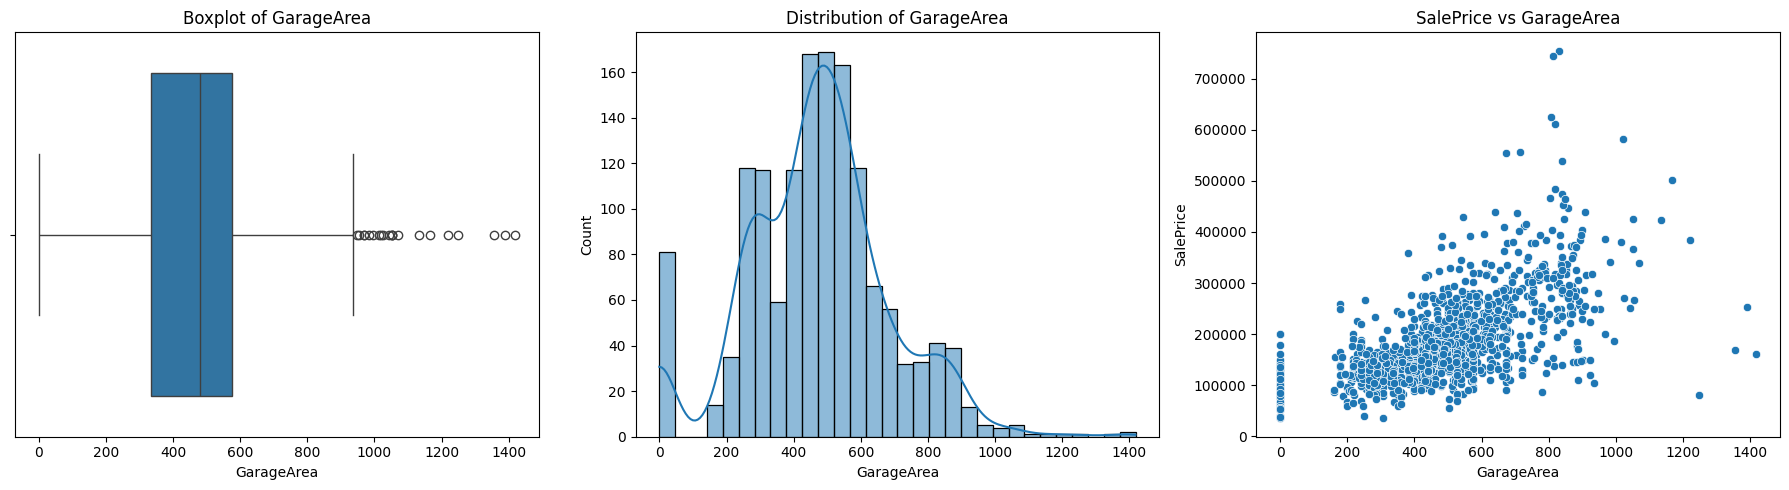

In [29]:
# List of columns with potential outliers
outlier_cols = ['LotFrontage', 'LotArea', 'MasVnrArea', 'GrLivArea', 'GarageArea']

# Plot boxplots, histograms, and scatter plots
for col in outlier_cols:
    plt.figure(figsize=(18, 5))
    
    # Boxplot
    plt.subplot(1, 3, 1)
    sns.boxplot(data=data, x=col)
    plt.title(f'Boxplot of {col}')
    
    # Histogram
    plt.subplot(1, 3, 2)
    sns.histplot(data=data, x=col, bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    
    # Scatter plot: SalePrice vs the column
    plt.subplot(1, 3, 3)
    sns.scatterplot(data=data, x=col, y='SalePrice')
    plt.title(f'SalePrice vs {col}')
    
    plt.tight_layout()
    plt.show()


In [30]:
data = data[data['LotFrontage'] <= 300]
#data = data[data['LotArea'] <= 50000]
#data = data[data['GrLivArea'] <= 4000]
#data = data[data['GarageArea'] <= 1200]

In [31]:
numerical_columns = data.select_dtypes(include=[np.number]).columns.tolist()

In [32]:
# Skewness of numerical columns
skewness = data[numerical_columns].skew()
print("Skewness:\n", skewness)

# Kurtosis of numerical columns
kurtosis = data[numerical_columns].kurtosis()
print("Kurtosis:\n", kurtosis)

Skewness:
 MSSubClass           1.406614
LotFrontage          0.608039
LotArea             12.509072
OverallQual          0.210134
OverallCond          0.694179
YearBuilt           -0.613527
YearRemodAdd        -0.501762
MasVnrArea           2.685304
BsmtFinSF1           0.792628
BsmtUnfSF            0.918669
TotalBsmtSF          0.572842
1stFlrSF             0.953058
2ndFlrSF             0.814342
GrLivArea            1.121913
BsmtFullBath         0.590358
FullBath             0.039160
HalfBath             0.676879
BedroomAbvGr         0.213426
KitchenAbvGr         4.484883
TotRmsAbvGrd         0.666496
Fireplaces           0.632060
GarageCars          -0.341141
GarageArea           0.132571
WoodDeckSF           1.542778
OpenPorchSF          2.368786
EnclosedPorch        3.087164
MoSold               0.214612
YrSold               0.096774
SalePrice            1.883609
HasMasVnr            0.388871
Has2ndFlr            0.274427
HasWoodDeck          0.085213
HasEnclosedPorch     2.045635

In [33]:
# List of columns to check for outliers
outlier_cols = ['LotArea', 'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea',
                'WoodDeckSF', 'TotPorch','SalePrice']

for col in outlier_cols:
    # Exclude zero values for mean and stddev computation
    non_zero_values = data[data[col] > 0][col]
    
    mean = non_zero_values.mean()
    stddev = non_zero_values.std()
    threshold = mean + 3 * stddev
    
    # Remove rows where column value is greater than mean + 3 * stddev
    data = data[data[col] <= threshold]

# Check remaining rows after outlier removal
print(f'Rows remaining after outlier removal: {data.shape[0]}')


Rows remaining after outlier removal: 1359


In [34]:
# Identify constant features
constant_features = data.columns[data.nunique() == 1]
print(f"Constant features: {constant_features.tolist()}")

# Remove constant features from the dataset 
data = data.drop(columns=constant_features)

Constant features: []


## Categorical Feature Processing

In [35]:
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
print(categorical_columns)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [36]:
for col in categorical_columns:
    print(f"Column: {col}")
    print(data[col].value_counts())
    print("\n")


Column: MSZoning
MSZoning
RL         1065
RM          211
FV           60
RH           15
C (all)       8
Name: count, dtype: int64


Column: Street
Street
Pave    1356
Grvl       3
Name: count, dtype: int64


Column: LotShape
LotShape
Reg    876
IR1    445
IR2     30
IR3      8
Name: count, dtype: int64


Column: LandContour
LandContour
Lvl    1233
Bnk      56
HLS      43
Low      27
Name: count, dtype: int64


Column: Utilities
Utilities
AllPub    1358
NoSeWa       1
Name: count, dtype: int64


Column: LotConfig
LotConfig
Inside     988
Corner     241
CulDSac     81
FR2         45
FR3          4
Name: count, dtype: int64


Column: LandSlope
LandSlope
Gtl    1297
Mod      54
Sev       8
Name: count, dtype: int64


Column: Neighborhood
Neighborhood
NAmes      218
CollgCr    147
OldTown    109
Edwards     96
Somerst     80
Gilbert     78
Sawyer      72
NWAmes      70
BrkSide     58
SawyerW     57
NridgHt     54
Mitchel     48
Crawfor     46
IDOTRR      35
Timber      32
NoRidge     28
S

In [37]:
columns_to_remove = ['Street','Utilities','Condition2','BsmtFinType2','RoofMatl','Heating','Electrical','Functional','SaleType']  #columns with only 1 significant category
# these columns have least importance acording to our random forest model 
# Drop these columns
data = data.drop(columns=columns_to_remove)

### Encoding binary and ordinal columns

In [38]:
# Binary Encoding (for binary features)
data['CentralAir'] = data['CentralAir'].map({'Y': 1, 'N': 0})

In [39]:
ord_c = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond']

# Define the quality mappings
quality_mapping = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}

# Loop through each column and map the values
for col in ord_c:
    data[col] = data[col].map(quality_mapping)

In [40]:
ord_c2 = ['BsmtExposure','BsmtFinType1']

quality_mapping = { 'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0,'Unf': 1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6}
for col in ord_c2:
    data[col] = data[col].map(quality_mapping)

In [41]:
data[ord_c+ord_c2].head()

,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond,BsmtExposure,BsmtFinType1
0,4,3,4,3,5,4,0,3,3,1,6
1,3,3,4,3,5,3,3,3,3,4,5
2,4,3,4,3,5,4,3,3,3,2,6
3,3,3,3,4,4,4,4,3,3,1,5
4,4,3,4,3,5,4,3,3,3,3,6


In [42]:
def combine_rare_categories(df, column, threshold=20):
    # Get category counts
    category_counts = df[column].value_counts()
    
    # Define rare categories
    rare_categories = category_counts[category_counts < threshold].index
    
    # Replace rare categories with 'Other'
    df[column] = df[column].apply(lambda x: 'Other' if x in rare_categories else x)
    return df

columns_to_adjust = data.select_dtypes(include=['object']).columns.tolist()
#columns_to_adjust.remove("Neighborhood")

for col in columns_to_adjust:
    data = combine_rare_categories(data, col)


In [43]:
average_prices = data.groupby('Neighborhood')['SalePrice'].mean()
average_prices=average_prices.sort_values(ascending=False)
print(average_prices)

Neighborhood
NoRidge    284158.571429
NridgHt    271381.074074
Timber     241867.281250
Somerst    223177.075000
Crawfor    199818.195652
ClearCr    197920.571429
CollgCr    195010.380952
Gilbert    193012.897436
NWAmes     185723.642857
SawyerW    184171.789474
Other      171780.681818
Mitchel    156025.750000
NAmes      143324.050459
Sawyer     135940.166667
SWISU      135399.272727
Edwards    125570.312500
BrkSide    124834.051724
OldTown    120536.321101
IDOTRR     102533.714286
Name: SalePrice, dtype: float64


In [44]:
#grouping neighborhood manually
#data['Neighborhood'] = data['Neighborhood'].replace({'MeadowV': 'L1','IDOTRR': 'L1','BrDale': 'L1','BrkSide': 'L2','OldTown': 'L2','Edwards': 'L2','Sawyer':'L3','Blueste':'L3','SWISU':'L3','NPkVill':'L3','NAmes':'L3','Mitchel':'L4','SawyerW':'L4','NWAmes':'L4','Gilbert':'L4','Blmngtn':'L4','CollgCr':'L5','Crawfor':'L5','ClearCr':'L5','Somerst':'L6','Veenker':'L6','Timber':'L6','StoneBr':'L7','NridgHt':'L7','NoRidge':'L7'})

# Data Analysis
  ## Correlation

In [45]:
numeric_df = data.select_dtypes(include=['float64', 'int64'])
numeric_df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SalePrice,TotPorch
0,60,65.0,8450,7,5,2003,2003,196.0,4,3,4,3,1,6,706,150,856,5,1,856,854,1710,1,2,1,3,1,4,8,0,0,2,548,3,3,0,61,0,2,2008,208500,61
1,20,80.0,9600,6,8,1976,1976,0.0,3,3,4,3,4,5,978,284,1262,5,1,1262,0,1262,0,2,0,3,1,3,6,1,3,2,460,3,3,298,0,0,5,2007,181500,0
2,60,68.0,11250,7,5,2001,2002,162.0,4,3,4,3,2,6,486,434,920,5,1,920,866,1786,1,2,1,3,1,4,6,1,3,2,608,3,3,0,42,0,9,2008,223500,42
3,70,60.0,9550,7,5,1915,1970,0.0,3,3,3,4,1,5,216,540,756,4,1,961,756,1717,1,1,0,3,1,4,7,1,4,3,642,3,3,0,35,272,2,2006,140000,307
4,60,84.0,14260,8,5,2000,2000,350.0,4,3,4,3,3,6,655,490,1145,5,1,1145,1053,2198,1,2,1,4,1,4,9,1,3,3,836,3,3,192,84,0,12,2008,250000,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,20,62.0,7500,7,5,2004,2005,0.0,4,3,4,3,1,6,410,811,1221,5,1,1221,0,1221,1,2,0,2,1,4,6,0,0,2,400,3,3,0,113,0,10,2009,185000,113
1455,60,62.0,7917,6,5,1999,2000,0.0,3,3,4,3,1,1,0,953,953,5,1,953,694,1647,0,2,1,3,1,3,7,1,3,2,460,3,3,0,40,0,8,2007,175000,40
1456,20,85.0,13175,6,6,1978,1988,119.0,3,3,4,3,1,5,790,589,1542,3,1,2073,0,2073,1,2,0,3,1,3,7,2,3,2,500,3,3,349,0,0,2,2010,210000,0
1457,70,66.0,9042,7,9,1941,2006,0.0,5,4,3,4,1,6,275,877,1152,5,1,1188,1152,2340,0,2,0,4,1,4,9,2,4,1,252,3,3,0,60,0,5,2010,266500,60


Text(0.5, 1.0, 'Correlation of Numeric Features with SalePrice')

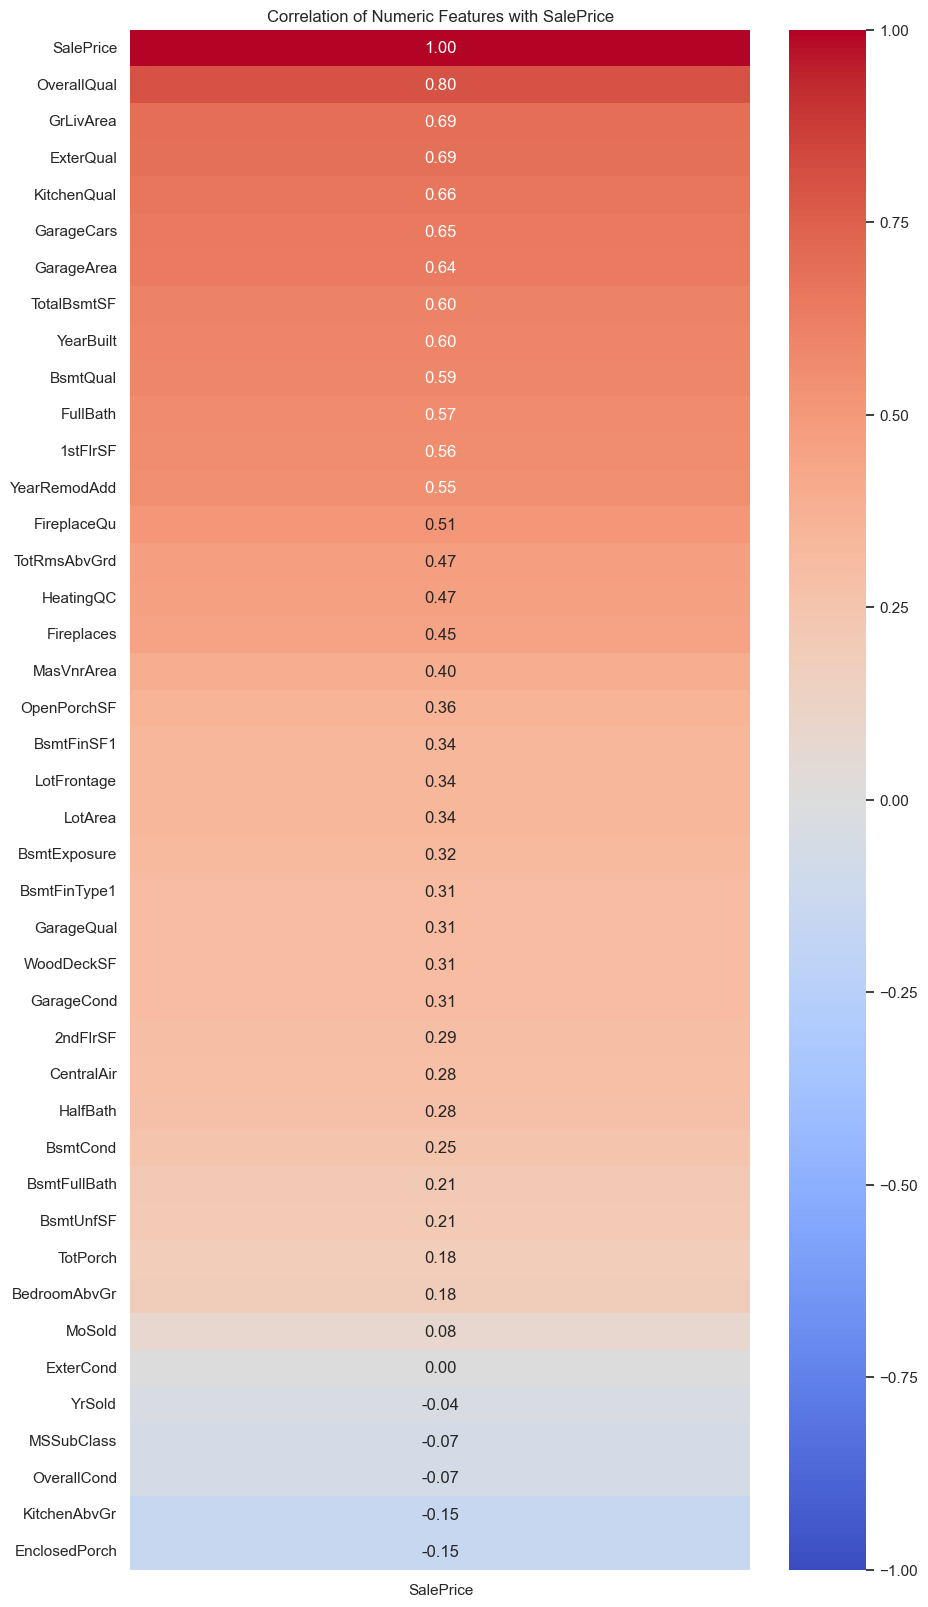

In [46]:
correlations = numeric_df.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False)
# Plot heatmap of correlations
sns.set()
plt.figure(figsize=(10, 20))
sns.heatmap(
    correlations,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    vmin=-1,
    vmax=1
)
plt.title('Correlation of Numeric Features with SalePrice')

In [47]:
# Target variable
target = 'SalePrice'

# Compute the correlation matrix
correlation_matrix = numeric_df.corr().abs()

# Create a mask to get the upper triangle of the correlation matrix
upper_triangle_mask = np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)

# Use the mask to get the upper triangle
upper_triangle_corr = correlation_matrix.where(upper_triangle_mask)

# Unstack the upper triangle correlation matrix and sort
high_correlation_pairs = upper_triangle_corr.unstack().dropna().sort_values(ascending=False)

# Filter the pairs with correlation above the threshold (e.g., 0.75)
high_correlation_pairs = high_correlation_pairs[high_correlation_pairs > 0.75]

# Display the high correlation pairs
print("High Correlation Pairs (without duplicates):")
print(high_correlation_pairs)

# Check their correlation with the target (SalePrice)
print("\nCorrelation with the target (SalePrice):")
for feature in set(high_correlation_pairs.index.get_level_values(0)).union(set(high_correlation_pairs.index.get_level_values(1))):
    if feature in numeric_df.columns:  # To ensure the feature is in the dataset
        corr_with_target = numeric_df[feature].corr(numeric_df[target])
        print(f"{feature}: {corr_with_target:.4f}")


High Correlation Pairs (without duplicates):
GarageCond    GarageQual     0.962156
GarageArea    GarageCars     0.886525
FireplaceQu   Fireplaces     0.876299
TotRmsAbvGrd  GrLivArea      0.812970
SalePrice     OverallQual    0.800907
1stFlrSF      TotalBsmtSF    0.777522
dtype: float64

Correlation with the target (SalePrice):
FireplaceQu: 0.5090
1stFlrSF: 0.5621
OverallQual: 0.8009
SalePrice: 1.0000
GarageArea: 0.6351
GarageCond: 0.3053
TotRmsAbvGrd: 0.4743
TotalBsmtSF: 0.6024
GrLivArea: 0.6918
GarageQual: 0.3120
GarageCars: 0.6482
Fireplaces: 0.4525


### Feature removing & Creating acording to correlation

In [48]:
data.drop(columns=['GarageCond'], inplace=True)
data.drop(columns=['Fireplaces'], inplace=True)
data.drop(columns=['GarageArea'], inplace=True)
data.drop(columns=['BsmtFinSF1'], inplace=True)
data.drop(columns=['TotRmsAbvGrd'], inplace=True)

data['TotalLivingSF'] = data['1stFlrSF'] + data['TotalBsmtSF']
# Drop the original columns
data.drop(columns=['1stFlrSF', 'TotalBsmtSF'], inplace=True)

In [49]:
data['OverallQual_GrLivArea']=data['OverallQual']*data['GrLivArea']
data['HouseAge'] = data['YrSold'] - data['YearBuilt']

In [50]:
# Save DataFrame to a Joblib file
joblib.dump(data, 'my_dataframe.joblib')

['my_dataframe.joblib']